In [149]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [150]:
data=pd.read_csv("Consumer_Complaints.csv")

In [151]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [152]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer Complaint', 'Company Public Response', 'Company', 'State',
       'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via',
       'Date Sent to Company', 'Company Response to Consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Unnamed: 18'],
      dtype='object')

In [153]:
data.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235170
Issue                                 0
Sub-issue                        496157
Consumer Complaint               747196
Company Public Response          706646
Company                               0
State                             12360
ZIP code                          16718
Tags                             883422
Consumer consent provided?       533099
Submitted via                         0
Date Sent to Company                  0
Company Response to Consumer          3
Timely response?                      0
Consumer disputed?               256456
Complaint ID                          0
Unnamed: 18                     1025010
dtype: int64

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025010 entries, 0 to 1025009
Data columns (total 19 columns):
Date received                   1025010 non-null object
Product                         1025010 non-null object
Sub-product                     789840 non-null object
Issue                           1025010 non-null object
Sub-issue                       528853 non-null object
Consumer Complaint              277814 non-null object
Company Public Response         318364 non-null object
Company                         1025010 non-null object
State                           1012650 non-null object
ZIP code                        1008292 non-null object
Tags                            141588 non-null object
Consumer consent provided?      491911 non-null object
Submitted via                   1025010 non-null object
Date Sent to Company            1025010 non-null object
Company Response to Consumer    1025007 non-null object
Timely response?                1025010 non-null obje

In [155]:
np.random.seed(10)
remove_n = 800000
drop_indices = np.random.choice(data.index, remove_n, replace=False)
data = data.drop(drop_indices)
data.shape

(225010, 19)

In [156]:
new=["Consumer Complaint","Product"]
newdata=data[new]

In [157]:
newdata.describe()

,Consumer Complaint,Product
count,60823,225010
unique,60060,18
top,There are many mistakes appear in my report wi...,Mortgage
freq,103,55660


In [158]:
newdata=newdata.drop_duplicates()

In [159]:
newdata=newdata.dropna(axis=0)

In [160]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60081 entries, 2 to 1025002
Data columns (total 2 columns):
Consumer Complaint    60081 non-null object
Product               60081 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


In [161]:
newdata['Product'] = newdata['Product'].astype('category')
newdata["Id"] = newdata['Product'].cat.codes


In [162]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


In [163]:
lemmatizer = WordNetLemmatizer() 
tokenizer = RegexpTokenizer(r'\w+')

In [164]:

def sentence_clean(sentence):
    word_list = tokenizer.tokenize(sentence)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(newdata['Consumer Complaint']).toarray()
labels = newdata["Id"]
features.shape

(60081, 147079)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(newdata['Consumer Complaint'], newdata['Product'],test_size=0.3,random_state=2)
count_vect = CountVectorizer()

In [224]:
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [225]:
reg = LogisticRegression(max_iter=500,multi_class="auto",penalty='l1')
reg.fit(X_train_tfidf, y_train)
acc_log_train = round(reg.score(X_train_tfidf, y_train) * 100, 2)
acc_log_test = round(reg.score(count_vect.transform(X_test), y_test) * 100, 2)

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [241]:
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train_tfidf, y_train)
acc_random_forest = round(random_forest.score(X_train_tfidf, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(count_vect.transform(X_test), y_test) * 100, 2)

Increasing the n_estimators, will increase the test acc

In [244]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [257]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train_tfidf, y_train) 
acc_decision_tree = round(decision_tree.score(X_train_tfidf, y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(count_vect.transform(X_test), y_test) * 100, 2)

In [269]:
test=KNeighborsClassifier(n_neighbors=500)
test.fit(X_train_tfidf, y_train) 
acc_Kneighbour=test.score(X_train_tfidf, y_train) * 100
acc_Kneighbour_test=test.score(count_vect.transform(X_test), y_test) * 100

In [288]:
linear_svc = LinearSVC( penalty='l1',dual=False,tol=1e-5)
linear_svc.fit(X_train_tfidf, y_train) 
acc_linear_svc = round(linear_svc.score(X_train_tfidf, y_train) * 100)
acc_linear_svc_test = round(linear_svc.score(count_vect.transform(X_test), y_test) * 100)

<BarContainer object of 5 artists>

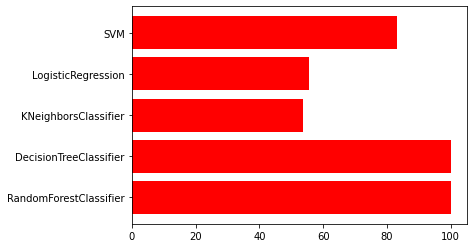

In [289]:
import matplotlib.pyplot as plt
Model=["RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","LogisticRegression","SVM"]
Accuracy=[acc_random_forest,acc_decision_tree,acc_Kneighbour,acc_log,acc_linear_svc]
plt.barh(Model,Accuracy,color="r")

<BarContainer object of 5 artists>

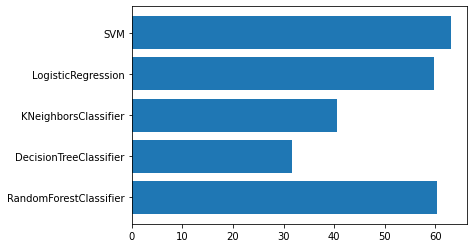

In [290]:

Model=["RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","LogisticRegression","SVM"]
Accuracy=[acc_random_forest_test,acc_decision_tree_test,acc_Kneighbour_test,acc_log_test,acc_linear_svc_test]
plt.barh(Model,Accuracy)

SyntaxError: invalid syntax (<ipython-input-303-287eb00099d1>, line 1)

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_tfidf, count_vect.transform(X_test), y_train, y_test)
models